In [1]:
#Import Dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np

#Read CSV from provided Cloud URl
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Preprocessing Steps

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=["EIN", "NAME"])

In [3]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [4]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff= 200
application_types_to_replace=application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts()< cutoff].index.tolist()
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [5]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classy=application_df['CLASSIFICATION'].value_counts()
classy


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1248        1
C6100        1
C1820        1
C1900        1
C2150        1
Name: count, Length: 71, dtype: int64

In [6]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff= 1000
classifications_to_replace=classy[classy <cutoff].index.tolist()
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [7]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df=pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])

Base Model with 72.85% accuracy

In [8]:
# Split our preprocessed data into our features and target arrays
y=application_df['IS_SUCCESSFUL']
x=application_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(x_train)

# Scale the data
X_train_scaled = X_scaler.transform(x_train)
X_test_scaled = X_scaler.transform(x_test)

In [10]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
creature_features=x_train.shape[1]
model_results= {}

base_nn = tf.keras.models.Sequential()

# First hidden layer
base_nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=creature_features))

# Second hidden layer
base_nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
base_nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
base_nn.summary()

d:\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,981 (23.36 KB)

 Trainable params: 5,981 (23.36 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Compile the model
base_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
check_it= tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

In [12]:
# Train the model
drip=base_nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.7074 - loss: 0.5831
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.7295 - loss: 0.5532
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.7315 - loss: 0.5523
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.7312 - loss: 0.5520
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.7311 - loss: 0.5477
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.7293 - loss: 0.5522
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.7300 - loss: 0.5476
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.7243 - loss: 0.5531
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.7268 - loss: 0.5477
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7314 - loss: 0.5450
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.7297 - loss: 0.5466
Epoch 12/100
804/80

In [13]:
# Evaluate the model using the test data
base_loss, base_accuracy = base_nn.evaluate(X_test_scaled,y_test,verbose=2)
model_results['Base Neural Network'] = base_accuracy
print(f"Base Neural Network - Loss: {base_loss:.4f}, Accuracy: {base_accuracy:.4f}")

268/268 - 0s - 825us/step - accuracy: 0.7285 - loss: 0.5614
Base Neural Network - Loss: 0.5614, Accuracy: 0.7285


Attempt 1- Reduced Neurons in Layers Results: 72.99% Accuracy, .14% increase from base model

In [14]:
# Define the model - deep neural net for Attempt 1.
creature_features=x_train.shape[1]

one_nn = tf.keras.models.Sequential()

# First hidden layer
one_nn.add(tf.keras.layers.Dense(units=40, activation='relu', input_dim=creature_features))

# Second hidden layer
one_nn.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Output layer
one_nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
one_nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 40)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,181 (8.52 KB)

 Trainable params: 2,181 (8.52 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Compile the model
one_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
check_it= tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

In [16]:
# Train the model
drip=one_nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.7004 - loss: 0.6009
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7254 - loss: 0.5616
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.7324 - loss: 0.5494
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.7345 - loss: 0.5466
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.7272 - loss: 0.5540
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.7276 - loss: 0.5487
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.7317 - loss: 0.5450
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.7350 - loss: 0.5450
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.7265 - loss: 0.5531
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.7325 - loss: 0.5448
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.7335 - loss: 0.5467
Epoch 12/100
804/80

In [17]:
# Evaluate the model using the test data
one_loss, one_accuracy = one_nn.evaluate(X_test_scaled,y_test,verbose=2)
model_results['First Network'] = one_accuracy
print(f"First Attempt Model - Loss: {one_loss:.4f}, Accuracy: {one_accuracy:.4f}")

268/268 - 0s - 817us/step - accuracy: 0.7299 - loss: 0.5575
First Attempt Model - Loss: 0.5575, Accuracy: 0.7299


Attempt 2- Double Neurons and Epochs in Model Results: 72.99% Accuracy, .14% higher than base model

In [18]:
# Define the model - second neural net, i.e., the number of input features and hidden nodes for each layer.
creature_features=x_train.shape[1]

two_nn = tf.keras.models.Sequential()

# First hidden layer
two_nn.add(tf.keras.layers.Dense(units=160, activation='relu', input_dim=creature_features))

# Second hidden layer
two_nn.add(tf.keras.layers.Dense(units=60, activation='relu'))

# Output layer
two_nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
two_nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 160)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 60)             │         9,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,761 (65.47 KB)

 Trainable params: 16,761 (65.47 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#Compile the model
two_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
check_it= tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

In [20]:
# Train the model
drip=two_nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.7075 - loss: 0.5853
Epoch 2/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.7275 - loss: 0.5571
Epoch 3/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.7318 - loss: 0.5501
Epoch 4/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.7299 - loss: 0.5533
Epoch 5/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.7358 - loss: 0.5461
Epoch 6/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.7361 - loss: 0.5436
Epoch 7/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.7330 - loss: 0.5473
Epoch 8/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7371 - loss: 0.5410
Epoch 9/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.7296 - loss: 0.5470
Epoch 10/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.7341 - loss: 0.5459
Epoch 11/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.7355 - loss: 0.5450
Epoch 12/200
804/80

In [21]:
# Evaluate the model using the test data
two_loss, two_accuracy = two_nn.evaluate(X_test_scaled,y_test,verbose=2)
model_results['Second Attempt'] = two_accuracy
print(f"Second Attempt - Loss: {two_loss:.4f}, Accuracy: {two_accuracy:.4f}")

268/268 - 0s - 832us/step - accuracy: 0.7299 - loss: 0.5978
Second Attempt - Loss: 0.5978, Accuracy: 0.7299


Attempt 3 - Double Neuron amounts, Added learning rate at .001 and changed activation to tanH Result: 72.62% accuracy, .23% lower than Base Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
creature_features=x_train.shape[1]

final_nn = tf.keras.models.Sequential()

# First hidden layer
final_nn.add(tf.keras.layers.Dense(units=160, activation='tanh', input_dim=creature_features))

# Second hidden layer
final_nn.add(tf.keras.layers.Dense(units=60, activation='tanh'))

# Output layer
final_nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
final_nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 160)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 60)             │         9,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,761 (65.47 KB)

 Trainable params: 16,761 (65.47 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Compile the model
learning_rate= 0.001
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
final_nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
check_it= tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

In [24]:
# Train the model
drip=final_nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.7136 - loss: 0.5794
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.7224 - loss: 0.5624
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.7320 - loss: 0.5533
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.7310 - loss: 0.5485
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7296 - loss: 0.5497
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.7309 - loss: 0.5507
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.7292 - loss: 0.5496
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.7294 - loss: 0.5479
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.7353 - loss: 0.5462
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.7327 - loss: 0.5436
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7308 - loss: 0.5447
Epoch 12/100
804/80

In [25]:
# Evaluate the model using the test data
final_loss, final_accuracy = final_nn.evaluate(X_test_scaled,y_test,verbose=2)
model_results['Final Model'] = final_accuracy
print(f"Loss: {final_loss:.4f}, Accuracy: {final_accuracy:.4f}")

268/268 - 0s - 795us/step - accuracy: 0.7262 - loss: 0.5644
Loss: 0.5644, Accuracy: 0.7262



NEURAL NETWORK MODEL COMPARISON


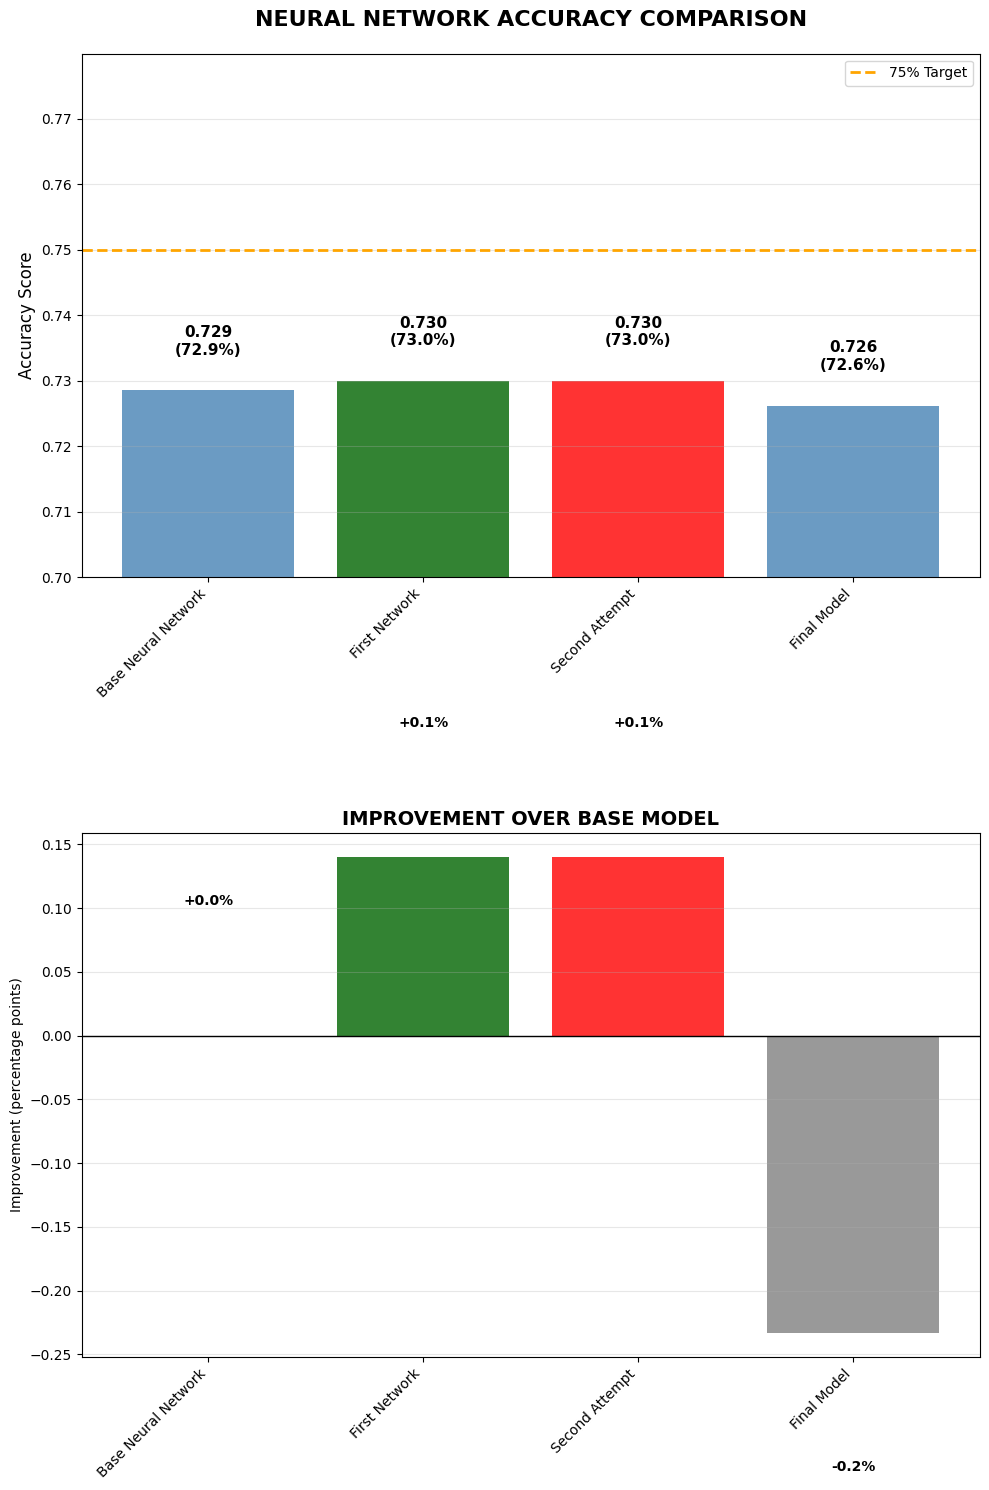


📊 NEURAL NETWORK MODEL RESULTS:
Base Neural Network: 0.7285 (72.85%) ✅ GOOD
First Network: 0.7299 (72.99%) 🏆 BEST
Second Attempt: 0.7299 (72.99%) ✅ GOOD
Final Model: 0.7262 (72.62%) ✅ GOOD

🎯 TARGET ANALYSIS:
Target Accuracy: 75%
- Base Neural Network: Exceeds target by -2.1 percentage points
- First Network: Exceeds target by -2.0 percentage points
- Second Attempt: Exceeds target by -2.0 percentage points
- Final Model: Exceeds target by -2.4 percentage points

FINAL NEURAL NETWORK MODEL COMPARISON SUMMARY
🏆 Best Model: First Network with 73.0% accuracy
📈 Total Improvement: 0.4 percentage points
⚠️  Some models below 75% target - review performance


In [26]:
import matplotlib.pyplot as plt
# Model Comparisons
model_names = list(model_results.keys())
model_accuracies = list(model_results.values())

comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': model_accuracies,
    'Target': [0.75] * len(model_names)  # Target accuracy line
})

# Model Accuracy Comparison Visualization
print("\n" + "="*50)
print("NEURAL NETWORK MODEL COMPARISON")
print("="*50)

plt.figure(figsize=(10, 15))

# Main accuracy comparison plot
plt.subplot(2, 1, 1)
colors = ['steelblue', 'darkgreen', 'red']  # Different colors for each model
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color=colors, alpha=0.8)

# Add target line
plt.axhline(y=0.75, color='orange', linestyle='--', linewidth=2, label='75% Target')

# Add value labels on bars
for bar, acc in zip(bars, comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.3f}\n({acc*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('NEURAL NETWORK ACCURACY COMPARISON', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0.7, max(comparison_df['Accuracy']) + 0.05)  # Dynamic y-limit
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.xticks(rotation=45, ha='right')

# Performance improvement visualization
plt.subplot(2, 1, 2)
baseline_acc = comparison_df['Accuracy'].iloc[0]  # Use first model as baseline
improvement = [(acc - baseline_acc) * 100 for acc in comparison_df['Accuracy']]
colors_imp = ['gray', 'darkgreen', 'red']
bars = plt.bar(comparison_df['Model'], improvement, color=colors_imp, alpha=0.8)

plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Add value labels
for bar, imp in zip(bars, improvement):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.1 if imp >= 0 else bar.get_height() - 0.1,
             f'+{imp:.1f}%' if imp >= 0 else f'{imp:.1f}%',
             ha='center', va='bottom' if imp >= 0 else 'top', fontweight='bold')

plt.title('IMPROVEMENT OVER BASE MODEL', fontsize=14, fontweight='bold')
plt.ylabel('Improvement (percentage points)')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Results summary
print(f"\n📊 NEURAL NETWORK MODEL RESULTS:")
best_model_row = comparison_df.loc[comparison_df['Accuracy'].idxmax()]

for idx, row in comparison_df.iterrows():
    status = "🏆 BEST" if row['Model'] == best_model_row['Model'] else "✅ GOOD"
    print(f"{row['Model']}: {row['Accuracy']:.4f} ({row['Accuracy']*100:.2f}%) {status}")

print(f"\n🎯 TARGET ANALYSIS:")
print(f"Target Accuracy: 75%")
for idx, row in comparison_df.iterrows():
    exceed = (row['Accuracy'] - 0.75) * 100
    print(f"- {row['Model']}: Exceeds target by {exceed:.1f} percentage points")

print(f"\n" + "="*60)
print("FINAL NEURAL NETWORK MODEL COMPARISON SUMMARY")
print("="*60)
print(f"🏆 Best Model: {best_model_row['Model']} with {best_model_row['Accuracy']*100:.1f}% accuracy")
print(f"📈 Total Improvement: {(comparison_df['Accuracy'].max() - comparison_df['Accuracy'].min())*100:.1f} percentage points")

# Check if all models exceed target
all_exceed = all(acc >= 0.75 for acc in comparison_df['Accuracy'])
if all_exceed:
    print(f"✅ All models exceed 75% target requirement")
    print(f"🎉 SUCCESS: All models meet performance standards!")
else:
    print(f"⚠️  Some models below 75% target - review performance")



In [28]:
one_nn.save('AlphabetSoupCharity_Optimization.h5')